# The Correlation Coefficient 

The correlation coefficient measures the extent to which the relationship between two variables is linear. Its value is always between -1 and 1. 
1. A positive coefficient indicates that the variables are directly related, i.e. when one increases the other one also increases. 
2. A negative coefficient indicates that the variables are inversely related, so that when one increases the other decreases. 

The closer to 0 the correlation coefficient is, the weaker the relationship between the variables.

### Correlation vs Covariance
Correlation is simply a normalized form of covariance. They are otherwise the same and are often used semi-interchangeably in everyday conversation. It is obviously important to be precise with language when discussing the two, but conceptually they are almost identical.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Let us take two variables X and Y and see its covariance:
X = np.random.rand(50)
Y = 2*X + 4

print(f'The covariance matrix of X and Y: \n {np.cov(X, Y)}')
print(f'\n The covariance of X and Y:  {np.cov(X, Y)[0,1]}')


The covariance matrix of X and Y: 
 [[0.09026662 0.18053323]
 [0.18053323 0.36106646]]

 The covariance of X and Y:  0.18053323151583528


In [23]:
# Let us try to manually calculate the correlation of X and Y:
den_X = np.sqrt(np.cov(X,X)[0,1])
den_Y = np.sqrt(np.cov(Y,Y)[0,1])
corr_XY_manually = np.cov(X, Y)[0,1]/(den_X * den_Y)
print(f'The correlation of X abd Y calculated manually:  {corr_XY_manually}')

The correlation of X abd Y calculated manually:  0.9999999999999999


In [12]:
# Let us calculate the correlation of X and Y using the inbuilt functions:
corr_XY_inbuilt = np.corrcoef(X,Y)[0,1]
print(f'The correlation of X and Y calculated using inbuilt functions:  {corr_XY_inbuilt}')

The correlation of X abd Y calculated using inbuilt functions:  0.9999999999999998


In [41]:
# But what is we use "variance" inbuilt function of numpy?
var_X = np.var(X, ddof=1)
print(f"The variance of X using numpy inbuilt var function: {var_X}")
print(f"The variance of X using cov(X,X) inbuilt function: {np.cov(X,X)[0,1]}")
difference = var_X - np.cov(X,X)[0,1]
print(f"The error encountered: {difference}")

The variance of X using numpy inbuilt var function: 0.09026661575791764
The variance of X using cov(X,X) inbuilt function: 0.09026661575791764
The error encountered: 0.0


### Why do both np.cov and np.corrcoef return matrices?

The covariance matrix is an important concept in statistics. Often people will refer to the covariance of two variables $X$ and $Y$, but in reality that is just one entry in the covariance matrix of $X$ and $Y$. For each input variable we have one row and one column. The diagonal is just the variance of that variable, or $Cov(X, X)$, entries off the diagonal are covariances between different variables. The matrix is symmetric across the diagonal. Let's check that this is true.

In [10]:
# Now, let us see the correlation:
print(f"The covariance of X and Y: \n {np.cov(X,Y)}")
print(f"The correlation of X and Y: \n {np.corrcoef(X,Y)}")

The covariance of X and Y: 
 [[0.08643541 0.17287083]
 [0.17287083 0.34574165]]
The correlation of X and Y: 
 [[1. 1.]
 [1. 1.]]


### Graphical Representation of two completely random variables:

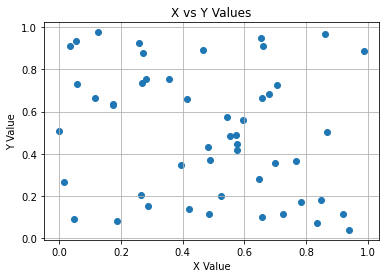

In [42]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("X vs Y Values")
plt.grid()
plt.show();

We see a crazy graph where nothing is understandable absolutely!

In [45]:
# Let us calculate the correlation of X and Y now:
correlation = np.cov(X,Y)[0,1]/((np.std(X))*(np.std(Y)))
builtin_correlation = np.corrcoef(X,Y)[0,1]
print(f"The manually calculated correlation: {correlation}")
print(f"The automatically calculated correlation: {builtin_correlation}")

The manually calculated correlation: -0.2301526233429716
The automatically calculated correlation: -0.22554957087611224


### Grahical Representation of two variables which are somewhat related

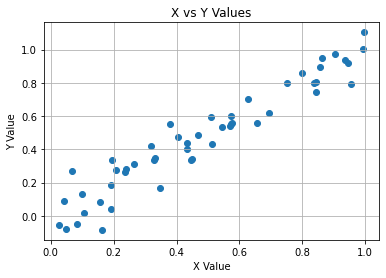

The manually calculated correlation: 0.9772784385043963
The automatically calculated correlation: 0.9577328697343085


In [48]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50) # This variable is X + (some random noise)

plt.scatter(X,Y)
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("X vs Y Values")
plt.grid()
plt.show();

# We also calculate the correlation:
correlation = np.cov(X,Y)[0,1]/((np.std(X))*(np.std(Y)))
builtin_correlation = np.corrcoef(X,Y)[0,1]
print(f"The manually calculated correlation: {correlation}")
print(f"The automatically calculated correlation: {builtin_correlation}")

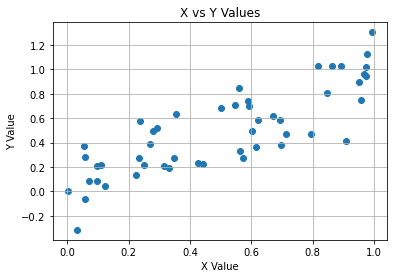

The manually calculated correlation: 0.8446658394793063
The automatically calculated correlation: 0.8277725226897205


In [49]:
# Let us add the noise and see the correlation:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.2, 50) # This variable is X + (some random noise)

plt.scatter(X,Y)
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("X vs Y Values")
plt.grid()
plt.show();

# We also calculate the correlation:
correlation = np.cov(X,Y)[0,1]/((np.std(X))*(np.std(Y)))
builtin_correlation = np.corrcoef(X,Y)[0,1]
print(f"The manually calculated correlation: {correlation}")
print(f"The automatically calculated correlation: {builtin_correlation}")

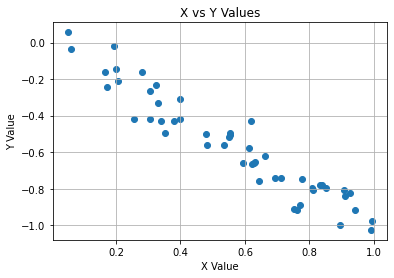

The manually calculated correlation: -0.9736341827121052
The automatically calculated correlation: -0.9541614990578632


In [51]:
# We cana aslo look at the negative relationship
X = np.random.rand(50)
Y = -X + np.random.normal(0, 0.1, 50) # This variable is X + (some random noise)

plt.scatter(X,Y)
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("X vs Y Values")
plt.grid()
plt.show();

# We also calculate the correlation:
correlation = np.cov(X,Y)[0,1]/((np.std(X))*(np.std(Y)))
builtin_correlation = np.corrcoef(X,Y)[0,1]
print(f"The manually calculated correlation: {correlation}")
print(f"The automatically calculated correlation: {builtin_correlation}")

# Appliation in Finance

### Determining Related Assets

First of all we need to see how much are the two series related. once we have established that the two series are probably related, we can use that in an effort to predict future values of the series. To show this, let us look at the price of AAPL and a semiconductor equipment manufacturer, Lam Research Corporation.

In [63]:
# First of all, let us pull the pricing data of these two:
import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2013,1,1)
end = dt.datetime(2015,1,1)

benchmark = web.DataReader('SPY', "yahoo", start, end)['Adj Close']
df_LRCX      = web.DataReader('LRCX', "yahoo", start, end)['Adj Close']
df_AAPL      = web.DataReader('AAPL', "yahoo", start, end)['Adj Close']

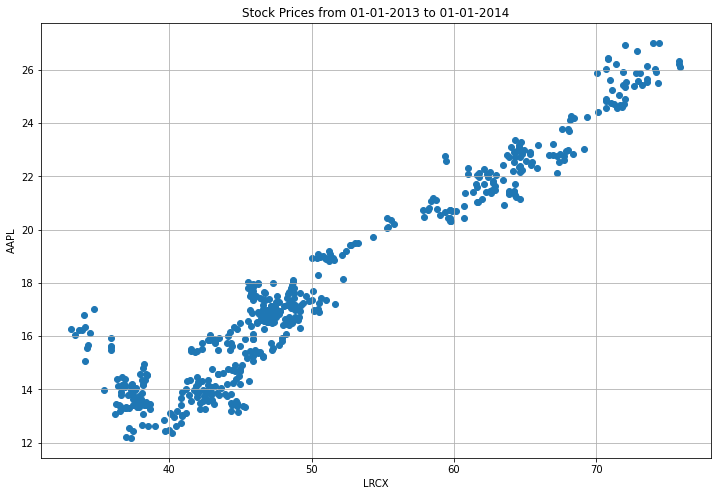

In [86]:
# We set the defailt size of the figure:
plt.rcParams["figure.figsize"] = (12,8)
# Let us first plot their closing prices:
plt.scatter(df_LRCX, df_AAPL)
plt.xlabel("LRCX")
plt.ylabel("AAPL")
plt.title("Stock Prices from 01-01-2013 to 01-01-2014")
plt.grid()
plt.show();

In [87]:
# We also calculate the correlations:
print("Correlation Coefficients")
print(f"\n LRCX and AAPL: {np.corrcoef(df_LRCX, df_AAPL)[0,1]}")
print(f"\n LRCX and SPY : {np.corrcoef(df_LRCX, benchmark)[0,1]}")
print(f"\n AAPL and SPY : {np.corrcoef(df_AAPL, benchmark)[0,1]}")

Correlation Coefficients

 LRCX and AAPL: 0.9595012089356312

 LRCX and SPY : 0.9390677486400046

 AAPL and SPY : 0.9078499638563094


1. LRCX and AAPL are pretty tightly correlated. But they are tightly correlated does not mean they are causated! This means that we cannot say that one is causing the other to move although they are moving together.
2. LRCX and SPY are also highly correlated. And this means LRCX moves tightly with the market,
3. The same can be said for AAPL and SPY as they are also highly correlated.

But we still have no idea who is moving whom!!


# Limitations 

### 1. Significance

It's hard to rigorously determine whether or not a correlation is significant, especially when, as here, the variables are not normally distributed. Their correlation coefficient is close to 1, so it's pretty safe to say that the two stock prices are correlated over the time period we use, but is this indicative of future correlation? If we examine the correlation of each of them with the S&P 500, we see that it is also quite high. So, AAPL and LRCX are slightly more correlated with each other than with the average stock.

One fundamental problem is that it is easy to datamine correlations by picking the right time period. To avoid this, one should compute the correlation of two quantities over many historical time periods and examine the distibution of the correlation coefficient. There is a reason why single point estimates are bad!



#### What are rolling correlations?

Correlations in time series are very useful because if a relationship exists, you can actually model/predict/forecast using the correlation. However, there’s one issue: a correlation is NOT static! It changes over time. Even the best models can be rendered useless during periods when correlation is low.

One of the most important calculations in time series analysis is the rolling correlation. Rolling correlations are simply applying a correlation between two time series (say sales of product x and product y) as a rolling window calculation.

Rolling correlations are simply applying a correlation between two time series (say sales of product x and product y) as a rolling window calculation. One major benefit of a rolling correlation is that we can visualize the change in correlation over time. 



As an example, remember that the correlation of AAPL and LRCX from 2013-1-1 to 2015-1-1 was 0.95. Let's take the rolling 60 day correlation between the two to see how that varies.

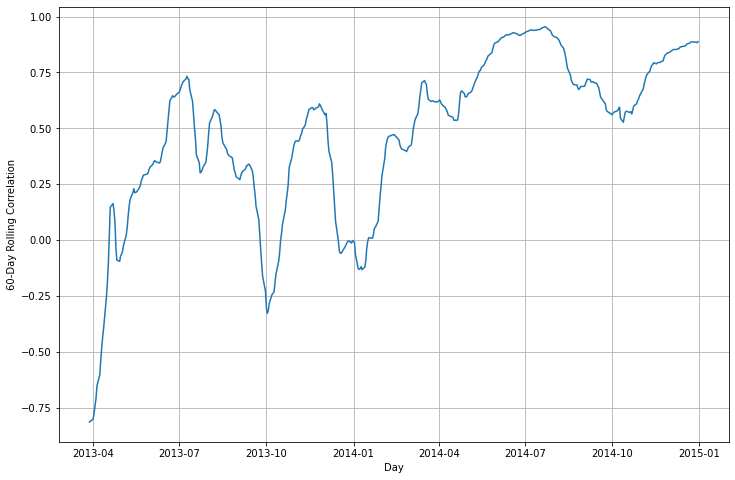

In [95]:
LRCX_series = pd.Series(df_LRCX)
AAPL_series = pd.Series(df_AAPL)
rolling_correlation = LRCX_series.rolling(60).corr(AAPL_series)
plt.plot(rolling_correlation)
plt.xlabel("Day")
plt.ylabel("60-Day Rolling Correlation")
plt.grid()
plt.show()

### 2. Non-Linear Relationships

The correlation coefficient can be useful for examining the strength of the relationship between two variables. However, it's important to remember that two variables may be associated in different, predictable ways which this analysis would not pick up. For instance, one variable might precisely follow the behavior of a second, but with a delay. There are techniques for dealing with this lagged correlation. Alternatively, a variable may be related to the rate of change of another. Neither of these relationships are linear, but can be very useful if detected.

Additionally, the correlation coefficient can be very sensitive to outliers. This means that including or excluding even a couple of data points can alter your result, and it is not always clear whether these points contain information or are simply noise.

As an example, let's make the noise distribution poisson rather than normal and see what happens.

0.33490107059001095

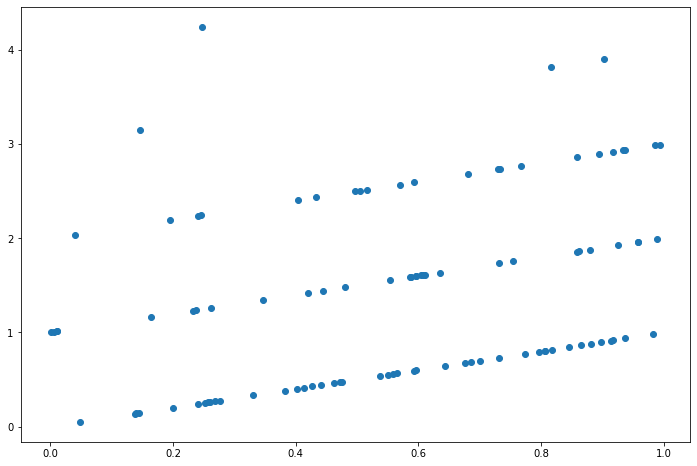

In [97]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X, Y)
np.corrcoef(X, Y)[0, 1]